In [1]:
import pandas as pd

In [2]:
import matplotlib as plt

In [3]:
import matplotlib.pyplot as plt2

In [4]:
import seaborn as sns

In [5]:
pd.read_csv("MentalHealthSurvey.csv")

,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,...,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities
0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,Off-Campus,No,No Sports,...,5,4,5,4,3,2,1,1,2,"Religious Activities, Social Connections, Onli..."
1,Male,20,UET,Postgraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,No,1-3 times,...,5,4,4,1,3,3,3,3,4,Online Entertainment
2,Male,20,FAST,Undergraduate,Computer Science,3rd year,2.5-3.0,Off-Campus,No,1-3 times,...,5,5,5,3,4,2,3,3,1,"Religious Activities, Sports and Fitness, Onli..."
3,Male,20,UET,Undergraduate,Computer Science,3rd year,2.5-3.0,On-Campus,No,No Sports,...,3,5,4,4,1,5,5,5,3,Online Entertainment
4,Female,20,UET,Undergraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,Yes,No Sports,...,3,5,5,2,3,5,5,4,4,Online Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Male,22,PU,Undergraduate,Information Technology,4th year,3.0-3.5,On-Campus,No,No Sports,...,4,3,1,4,4,2,3,1,2,"Online Entertainment, Outdoor Activities, Sleep"
83,Female,22,COMSATS,Undergraduate,Software Engineering,4th year,3.5-4.0,Off-Campus,Yes,No Sports,...,5,5,5,5,1,5,5,5,5,"Religious Activities, Sleep"
84,Male,21,PU,Undergraduate,Data Science,2nd year,2.0-2.5,Off-Campus,No,No Sports,...,5,4,2,4,3,1,2,1,1,"Religious Activities, Sports and Fitness, Soci..."
85,Male,22,PU,Undergraduate,Data Science,2nd year,2.5-3.0,Off-Campus,No,No Sports,...,3,3,3,3,2,3,4,4,5,Sleep


In [6]:
raw_data = pd.read_csv("MentalHealthSurvey.csv")

In [7]:
raw_data.columns

Index(['gender', 'age', 'university', 'degree_level', 'degree_major',
       'academic_year', 'cgpa', 'residential_status', 'campus_discrimination',
       'sports_engagement', 'average_sleep', 'study_satisfaction',
       'academic_workload ', 'academic_pressure', 'financial_concerns',
       'social_relationships', 'depression', 'anxiety', 'isolation',
       'future_insecurity', 'stress_relief_activities'],
      dtype='object')

In [8]:
raw_data.isnull().sum()

gender                      0
age                         0
university                  0
degree_level                0
degree_major                0
academic_year               0
cgpa                        0
residential_status          0
campus_discrimination       0
sports_engagement           0
average_sleep               0
study_satisfaction          0
academic_workload           0
academic_pressure           0
financial_concerns          0
social_relationships        0
depression                  0
anxiety                     0
isolation                   0
future_insecurity           0
stress_relief_activities    0
dtype: int64

In [9]:
raw_data.groupby("sports_engagement").size()

sports_engagement
1-3 times    24
4-6 times    11
7+ times     10
No Sports    42
dtype: int64

In [10]:
sports_aggregation = raw_data.groupby("sports_engagement").sum('isolation')

sports_aggregation

,age,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity
sports_engagement,,,,,,,,,,
1-3 times,490,100,101,90,79,65,73,82,74,74
4-6 times,217,46,35,40,29,42,23,23,24,27
7+ times,191,39,37,40,37,33,34,31,32,34
No Sports,837,157,165,159,150,102,150,144,152,127


In [11]:
sports_aggregation = raw_data.groupby("sports_engagement").sum('isolation')
new_index = ['No Sports', '1-3 times', '4-6 times', '7+ times']
sports_sorted = sports_aggregation.reindex(new_index)
sports_sorted['count'] = raw_data.groupby("sports_engagement").size()
sports_sorted

,age,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,count
sports_engagement,,,,,,,,,,,
No Sports,837,157,165,159,150,102,150,144,152,127,42
1-3 times,490,100,101,90,79,65,73,82,74,74,24
4-6 times,217,46,35,40,29,42,23,23,24,27,11
7+ times,191,39,37,40,37,33,34,31,32,34,10


In [12]:
sports_sorted['avg_depression'] = sports_sorted['depression']/sports_sorted['count']
sports_sorted['avg_anxiety'] = sports_sorted['anxiety']/sports_sorted['count']
sports_sorted['avg_isolation'] = sports_sorted['isolation']/sports_sorted['count']
sports_sorted

,age,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,count,avg_depression,avg_anxiety,avg_isolation
sports_engagement,,,,,,,,,,,,,,
No Sports,837,157,165,159,150,102,150,144,152,127,42,3.571429,3.428571,3.619048
1-3 times,490,100,101,90,79,65,73,82,74,74,24,3.041667,3.416667,3.083333
4-6 times,217,46,35,40,29,42,23,23,24,27,11,2.090909,2.090909,2.181818
7+ times,191,39,37,40,37,33,34,31,32,34,10,3.400000,3.100000,3.200000


(0.0, 5.0)

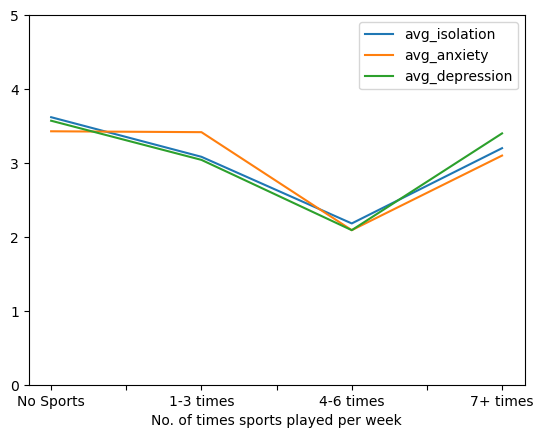

In [13]:
sports_plot = sports_sorted.plot(y=['avg_isolation', 'avg_anxiety', 'avg_depression'])
sports_plot.set_xlabel('No. of times sports played per week')
sports_plot.set_ylim(0,5)

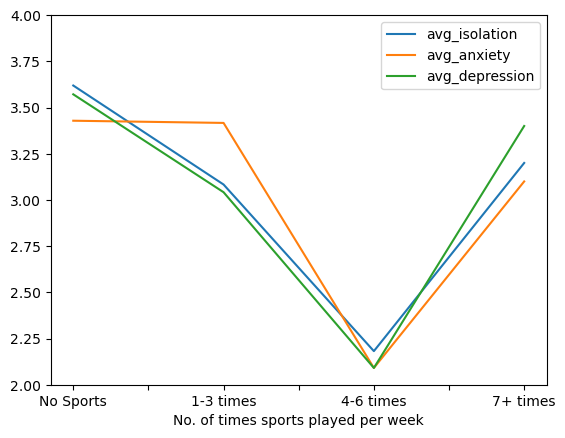

In [14]:
fig = sports_plot.get_figure()
fig.savefig('sports_mental_health_avgs.png')

sports_plot2 = sports_sorted.plot(y=['avg_isolation', 'avg_anxiety', 'avg_depression'])
sports_plot2.set_xlabel('No. of times sports played per week')
sports_plot2.set_ylim(2,4)

fig2 = sports_plot2.get_figure()
fig2.savefig('sports_mental_health_avgs_zoom_in.png')

In [15]:
residential_data = raw_data.groupby('residential_status').sum('isolation')
residential_data['count'] = raw_data.groupby('residential_status').size()
residential_data

,age,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,count
residential_status,,,,,,,,,,,
Off-Campus,1299,255,249,243,211,180,210,212,214,202,65
On-Campus,436,87,89,86,84,62,70,68,68,60,22


In [16]:
residential_data['avg_isolation'] = residential_data['isolation']/residential_data['count']
residential_data['avg_depression'] = residential_data['depression']/residential_data['count']
residential_data['avg_anxiety'] = residential_data['anxiety']/residential_data['count']
residential_data

,age,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,count,avg_isolation,avg_depression,avg_anxiety
residential_status,,,,,,,,,,,,,,
Off-Campus,1299,255,249,243,211,180,210,212,214,202,65,3.292308,3.230769,3.261538
On-Campus,436,87,89,86,84,62,70,68,68,60,22,3.090909,3.181818,3.090909


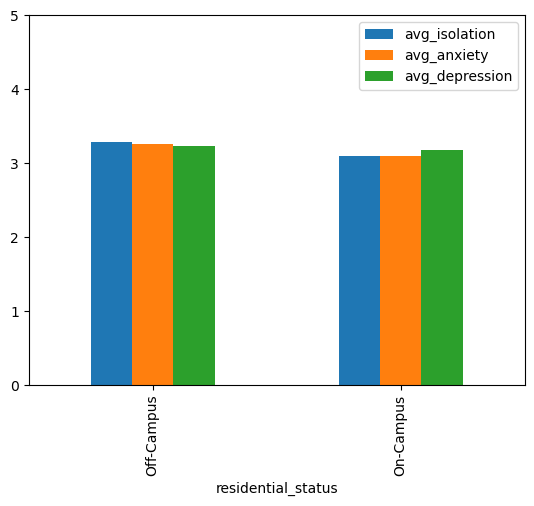

In [127]:
resedential_avg_fig = residential_data.plot(y=['avg_isolation', 'avg_anxiety', 'avg_depression'], ylim=(0,5), kind='bar').get_figure()

In [130]:
resedential_avg_fig.savefig('residential_mental_health_avgs.png', bbox_inches='tight')

<Axes: xlabel='residential_status'>

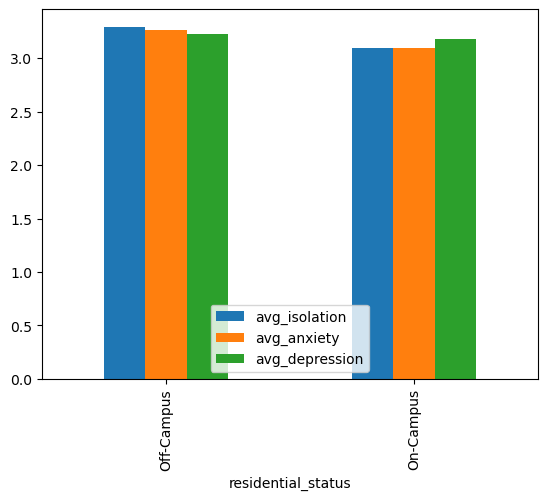

In [18]:
residential_data.plot(y=['avg_isolation', 'avg_anxiety', 'avg_depression'], kind='bar')

In [19]:
academic_year_data = raw_data.groupby('academic_year').sum('isolation')
academic_year_data['count'] = raw_data.groupby('academic_year').size()
academic_year_data

,age,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,count
academic_year,,,,,,,,,,,
1st year,644,138,129,128,116,93,113,106,119,92,34
2nd year,306,59,55,53,45,48,34,34,29,40,15
3rd year,564,107,117,119,96,77,95,101,97,98,28
4th year,221,38,37,29,38,24,38,39,37,32,10


In [20]:
academic_year_data['avg_depression'] = academic_year_data['depression']/academic_year_data['count']
academic_year_data['avg_isolation'] = academic_year_data['isolation']/academic_year_data['count']
academic_year_data['avg_anxiety'] = academic_year_data['anxiety']/academic_year_data['count']

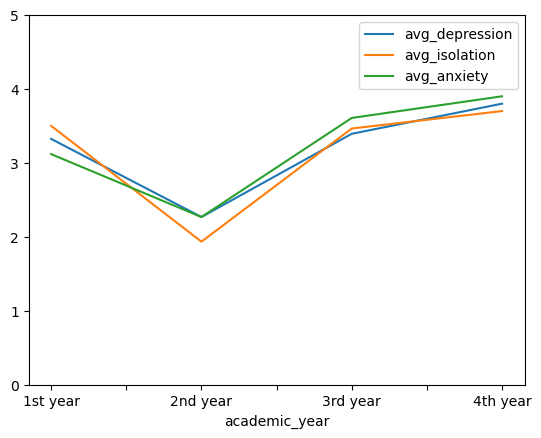

In [42]:
academic_year_plot = academic_year_data.plot(y=['avg_depression', 'avg_isolation', 'avg_anxiety'], ylim=(0, 5))
academic_year_fig = academic_year_plot.get_figure()
academic_year_fig.savefig('academic_year_mental_health_avgs.png')

In [22]:
degree_stats = raw_data.groupby('degree_major').sum('isolation')
degree_stats['count'] = raw_data.groupby('degree_major').size()
degree_stats

,age,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,count
degree_major,,,,,,,,,,,
Computer Science,671,130,137,144,124,91,119,125,118,116,34
Data Science,816,166,156,145,132,119,119,110,118,111,41
Information Technology,183,34,32,27,25,27,29,32,32,24,9
Software Engineering,65,12,13,13,14,5,13,13,14,11,3


In [23]:
degree_stats['avg_depression'] = degree_stats['depression']/degree_stats['count']
degree_stats['avg_anxiety'] = degree_stats['anxiety']/degree_stats['count']
degree_stats['avg_isolation'] = degree_stats['isolation']/degree_stats['count']

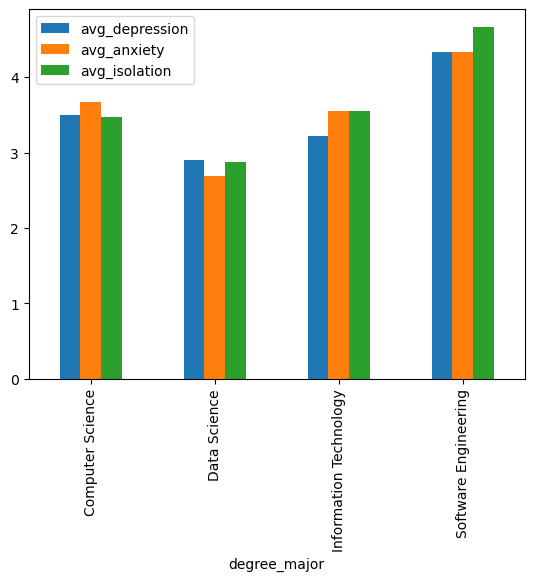

In [120]:
degree_plot = degree_stats.plot(y=['avg_depression', 'avg_anxiety', 'avg_isolation'], kind='bar')
degree_fig = degree_plot.get_figure()
degree_fig.savefig('degree_mental_health_avgs.png', bbox_inches='tight')

In [25]:
sleep_data = raw_data.groupby('average_sleep').sum('isolation')
sleep_data['count'] = raw_data.groupby('average_sleep').size()
sleep_data

,age,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,count
average_sleep,,,,,,,,,,,
2-4 hrs,101,18,22,23,17,9,18,18,20,15,5
4-6 hrs,988,196,207,198,187,136,171,173,168,159,50
7-8 hrs,646,128,109,108,91,97,91,89,94,88,32


In [26]:
sleep_data['avg_depression'] = sleep_data['depression']/sleep_data['count']
sleep_data['avg_anxiety'] = sleep_data['anxiety']/sleep_data['count']
sleep_data['avg_isolation'] = sleep_data['isolation']/sleep_data['count']

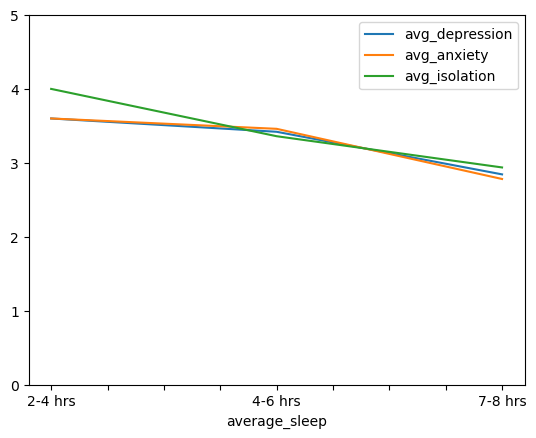

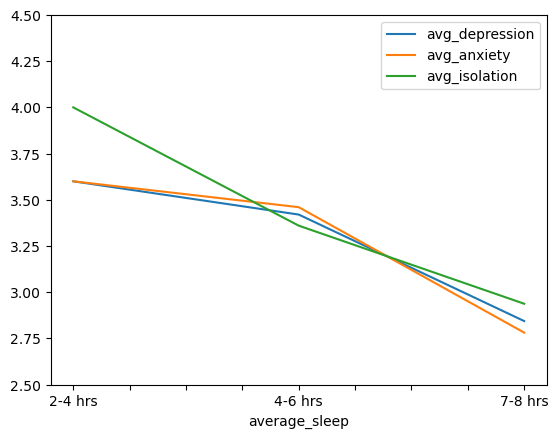

In [46]:
regular_sleep_plot = sleep_data.plot(y=['avg_depression', 'avg_anxiety', 'avg_isolation'], ylim=(0, 5))
zoomed_sleep_plot = sleep_data.plot(y=['avg_depression', 'avg_anxiety', 'avg_isolation'], ylim=(2.5, 4.5))

<Axes: xlabel='average_sleep'>

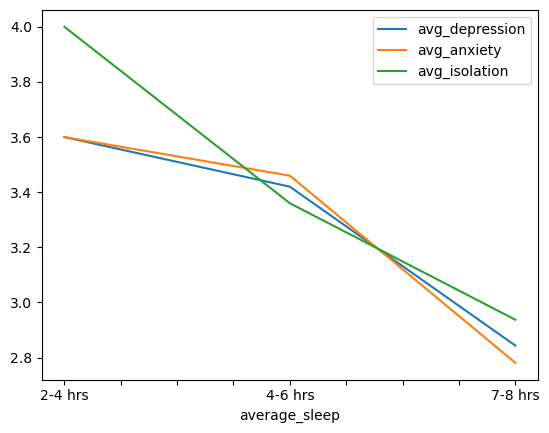

In [28]:
sleep_data.plot(y=['avg_depression', 'avg_anxiety', 'avg_isolation'])

In [29]:
averages = raw_data.describe()
averages

,age,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,19.942529,3.931034,3.885057,3.781609,3.390805,2.781609,3.218391,3.218391,3.241379,3.011494
std,1.623636,1.043174,0.854880,1.125035,1.400634,1.175578,1.367609,1.297809,1.405682,1.385089
min,17.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,3.000000,3.000000,3.000000,2.500000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,20.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,21.000000,5.000000,4.500000,5.000000,5.000000,4.000000,4.000000,4.000000,4.500000,4.000000
max,26.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [30]:
avgs = averages.loc['mean']

In [31]:
avgs = avgs.drop('age')

<Axes: >

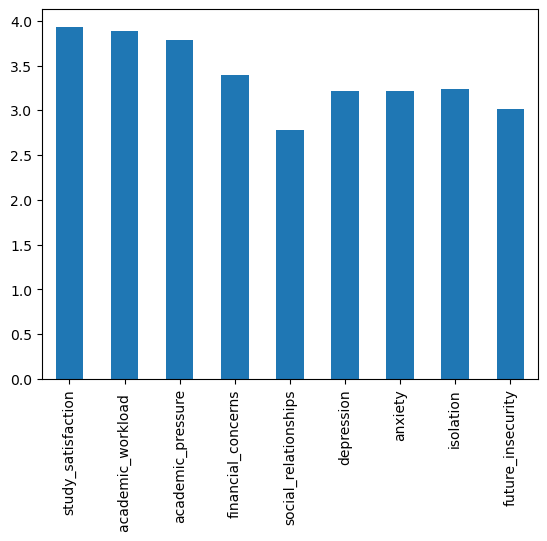

In [32]:
avgs.plot(kind='bar')

In [78]:
raw_data.groupby('stress_relief_activities').size()

stress_relief_activities
Creative Outlets                                                                                                  2
Creative Outlets, Social Connections, Online Entertainment                                                        1
Creative Outlets, Social Connections, Online Entertainment, Outdoor Activities                                    1
Nothing                                                                                                           1
Online Entertainment                                                                                              9
Online Entertainment, Outdoor Activities, Sleep                                                                   1
Online Entertainment, Sleep                                                                                       1
Outdoor Activities                                                                                                5
Religious Activities                           

In [79]:
raw_data.groupby('stress_relief_activities').size().iloc[1]

1

In [80]:
unparsed_stress_relief = raw_data.groupby('stress_relief_activities').sum('isolation')
unparsed_stress_relief['count'] = raw_data.groupby('stress_relief_activities').size()

In [81]:
unparsed_stress_relief['avg_depression'] = unparsed_stress_relief['depression']/unparsed_stress_relief['count']
unparsed_stress_relief['avg_anxiety'] = unparsed_stress_relief['anxiety']/unparsed_stress_relief['count']
unparsed_stress_relief['avg_isolation'] = unparsed_stress_relief['isolation']/unparsed_stress_relief['count']

<Axes: xlabel='stress_relief_activities'>

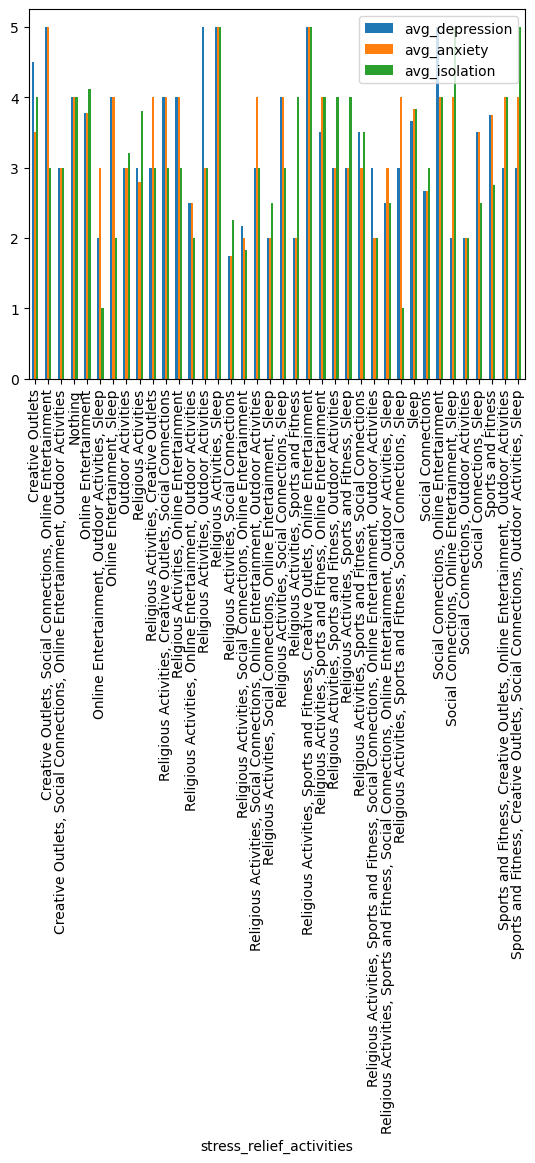

In [82]:
unparsed_stress_relief.plot(y=['avg_depression', 'avg_anxiety', 'avg_isolation'], kind='bar')

In [83]:
single_stress_relief = unparsed_stress_relief

In [84]:
for item in unparsed_stress_relief.index:
    comma_loc = item.find(',')
    if comma_loc!=-1:
        single_stress_relief = single_stress_relief.drop(item, axis=0)

In [85]:
single_stress_relief

,age,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,count,avg_depression,avg_anxiety,avg_isolation
stress_relief_activities,,,,,,,,,,,,,,
Creative Outlets,37,6,8,9,8,4,9,7,8,6,2,4.500000,3.500000,4.000000
Nothing,21,5,3,5,5,1,4,4,4,2,1,4.000000,4.000000,4.000000
Online Entertainment,174,31,35,35,25,17,34,34,37,34,9,3.777778,3.777778,4.111111
Outdoor Activities,97,17,19,23,13,17,15,15,16,19,5,3.000000,3.000000,3.200000
Religious Activities,195,37,33,35,31,28,30,28,38,23,10,3.000000,2.800000,3.800000
Sleep,117,22,23,21,20,14,22,23,23,17,6,3.666667,3.833333,3.833333
Social Connections,60,13,11,12,10,7,8,8,9,7,3,2.666667,2.666667,3.000000
Sports and Fitness,79,16,17,15,17,13,15,15,11,14,4,3.750000,3.750000,2.750000


<Axes: xlabel='stress_relief_activities'>

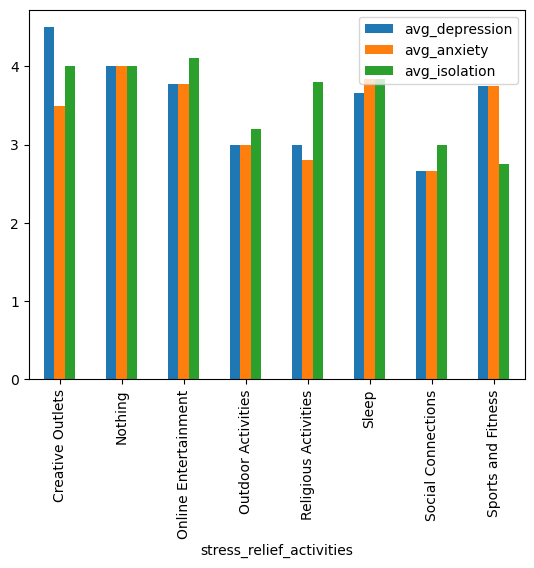

In [86]:
single_stress_relief.plot(y=['avg_depression', 'avg_anxiety', 'avg_isolation'], kind='bar')

In [87]:
stress_relief_dummies = pd.get_dummies(raw_data, columns=['stress_relief_activities'], dtype=int)

In [88]:
stress_relief_dummies

,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,...,"stress_relief_activities_Religious Activities, Sports and Fitness, Social Connections, Sleep",stress_relief_activities_Sleep,stress_relief_activities_Social Connections,"stress_relief_activities_Social Connections, Online Entertainment","stress_relief_activities_Social Connections, Online Entertainment, Sleep","stress_relief_activities_Social Connections, Outdoor Activities","stress_relief_activities_Social Connections, Sleep",stress_relief_activities_Sports and Fitness,"stress_relief_activities_Sports and Fitness, Creative Outlets, Online Entertainment, Outdoor Activities","stress_relief_activities_Sports and Fitness, Creative Outlets, Social Connections, Outdoor Activities, Sleep"
0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,Off-Campus,No,No Sports,...,0,0,0,0,0,0,0,0,0,0
1,Male,20,UET,Postgraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,No,1-3 times,...,0,0,0,0,0,0,0,0,0,0
2,Male,20,FAST,Undergraduate,Computer Science,3rd year,2.5-3.0,Off-Campus,No,1-3 times,...,0,0,0,0,0,0,0,0,0,0
3,Male,20,UET,Undergraduate,Computer Science,3rd year,2.5-3.0,On-Campus,No,No Sports,...,0,0,0,0,0,0,0,0,0,0
4,Female,20,UET,Undergraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,Yes,No Sports,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Male,22,PU,Undergraduate,Information Technology,4th year,3.0-3.5,On-Campus,No,No Sports,...,0,0,0,0,0,0,0,0,0,0
83,Female,22,COMSATS,Undergraduate,Software Engineering,4th year,3.5-4.0,Off-Campus,Yes,No Sports,...,0,0,0,0,0,0,0,0,0,0
84,Male,21,PU,Undergraduate,Data Science,2nd year,2.0-2.5,Off-Campus,No,No Sports,...,0,0,0,0,0,0,0,0,0,0
85,Male,22,PU,Undergraduate,Data Science,2nd year,2.5-3.0,Off-Campus,No,No Sports,...,0,1,0,0,0,0,0,0,0,0


In [98]:
creative_unparsed_stress_relief = raw_data.groupby('stress_relief_activities').sum('isolation')
creative_unparsed_stress_relief['count'] = raw_data.groupby('stress_relief_activities').size()
creative_unparsed_stress_relief['count']

stress_relief_activities
Creative Outlets                                                                                                  2
Creative Outlets, Social Connections, Online Entertainment                                                        1
Creative Outlets, Social Connections, Online Entertainment, Outdoor Activities                                    1
Nothing                                                                                                           1
Online Entertainment                                                                                              9
Online Entertainment, Outdoor Activities, Sleep                                                                   1
Online Entertainment, Sleep                                                                                       1
Outdoor Activities                                                                                                5
Religious Activities                           

In [90]:
creative_single_stress_relief = creative_unparsed_stress_relief
for item in creative_unparsed_stress_relief.index:
    comma_loc = item.find(',')
    if comma_loc!=-1:
        creative_single_stress_relief = creative_single_stress_relief.drop(item, axis=0)

In [91]:
creative_single_stress_relief

,age,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,count
stress_relief_activities,,,,,,,,,,,
Creative Outlets,37,6,8,9,8,4,9,7,8,6,2
Nothing,21,5,3,5,5,1,4,4,4,2,1
Online Entertainment,174,31,35,35,25,17,34,34,37,34,9
Outdoor Activities,97,17,19,23,13,17,15,15,16,19,5
Religious Activities,195,37,33,35,31,28,30,28,38,23,10
Sleep,117,22,23,21,20,14,22,23,23,17,6
Social Connections,60,13,11,12,10,7,8,8,9,7,3
Sports and Fitness,79,16,17,15,17,13,15,15,11,14,4


In [92]:
for item in creative_unparsed_stress_relief.index:
    orig_item = item
    if item in creative_single_stress_relief.index:
        continue
    else:
        while item.find(',') != -1:
            comma_loc = item.find(',')
            split_item = item[:comma_loc]
            item = item[comma_loc+1:]
            item = item.strip()
            split_item = split_item.strip()
            creative_single_stress_relief.loc[split_item] += creative_unparsed_stress_relief.loc[orig_item]
        creative_single_stress_relief.loc[item] += creative_unparsed_stress_relief.loc[orig_item]

In [64]:
store_single_relif = creative_single_stress_relief

In [66]:
store_unparsed_relief = creative_unparsed_stress_relief

In [94]:
creative_single_stress_relief.iloc[1]

age                     21
study_satisfaction       5
academic_workload        3
academic_pressure        5
financial_concerns       5
social_relationships     1
depression               4
anxiety                  4
isolation                4
future_insecurity        2
count                    1
Name: Nothing, dtype: int64

In [102]:
creative_single_stress_relief

,age,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,count
stress_relief_activities,,,,,,,,,,,
Creative Outlets,198,37,40,36,40,24,40,41,39,30,10
Nothing,21,5,3,5,5,1,4,4,4,2,1
Online Entertainment,750,146,150,133,131,101,119,122,115,124,37
Outdoor Activities,381,75,73,69,66,63,55,56,54,55,19
Religious Activities,920,188,177,173,151,138,137,134,140,129,46
Sleep,399,82,80,74,71,55,64,71,64,56,20
Social Connections,665,138,132,121,119,95,91,92,87,95,33
Sports and Fitness,398,83,80,76,78,61,67,69,67,55,20


In [103]:
creative_single_stress_relief_avgs = creative_single_stress_relief

In [105]:
creative_single_stress_relief_avgs['avg_depression'] = creative_single_stress_relief['depression']/creative_single_stress_relief['count']
creative_single_stress_relief_avgs['avg_anxiety'] = creative_single_stress_relief['anxiety']/creative_single_stress_relief['count']
creative_single_stress_relief_avgs['avg_isolation'] = creative_single_stress_relief['isolation']/creative_single_stress_relief['count']

In [106]:
creative_single_stress_relief_avgs

,age,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,count,avg_depression,avg_anxiety,avg_isolation
stress_relief_activities,,,,,,,,,,,,,,
Creative Outlets,198,37,40,36,40,24,40,41,39,30,10,4.000000,4.100000,3.900000
Nothing,21,5,3,5,5,1,4,4,4,2,1,4.000000,4.000000,4.000000
Online Entertainment,750,146,150,133,131,101,119,122,115,124,37,3.216216,3.297297,3.108108
Outdoor Activities,381,75,73,69,66,63,55,56,54,55,19,2.894737,2.947368,2.842105
Religious Activities,920,188,177,173,151,138,137,134,140,129,46,2.978261,2.913043,3.043478
Sleep,399,82,80,74,71,55,64,71,64,56,20,3.200000,3.550000,3.200000
Social Connections,665,138,132,121,119,95,91,92,87,95,33,2.757576,2.787879,2.636364
Sports and Fitness,398,83,80,76,78,61,67,69,67,55,20,3.350000,3.450000,3.350000


<Axes: xlabel='stress_relief_activities'>

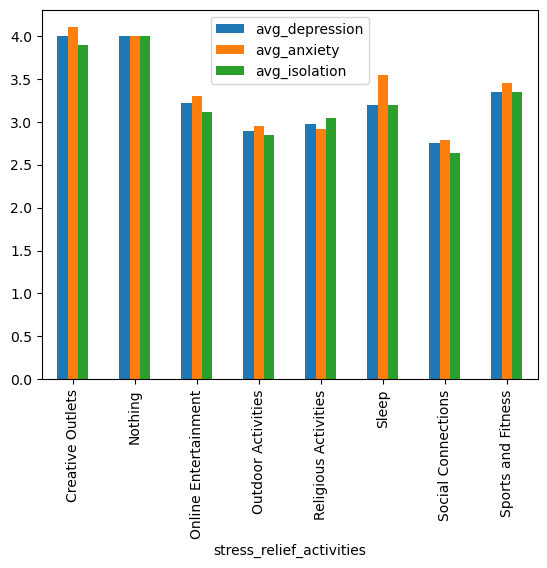

In [108]:
creative_single_stress_relief_avgs.plot(y=['avg_depression', 'avg_anxiety', 'avg_isolation'], kind='bar')

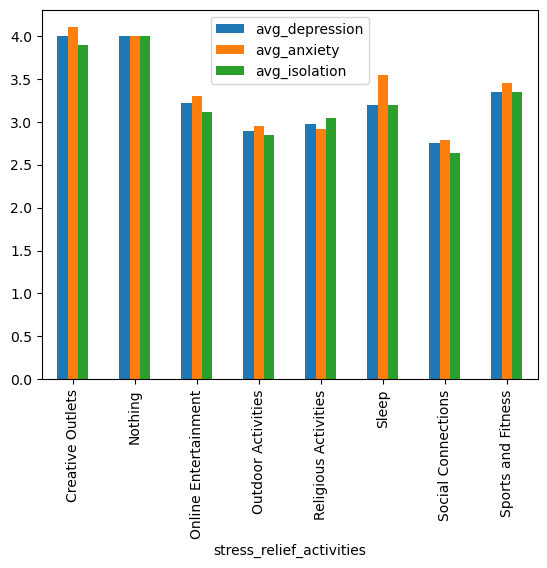

In [116]:
avg_stress_relief_plot = creative_single_stress_relief_avgs.plot(y=['avg_depression', 'avg_anxiety', 'avg_isolation'], kind='bar')

In [119]:
avg_stress_relief_fig = avg_stress_relief_plot.get_figure()
avg_stress_relief_fig.savefig('stress_relief_mental_health_avgs.png', bbox_inches='tight')

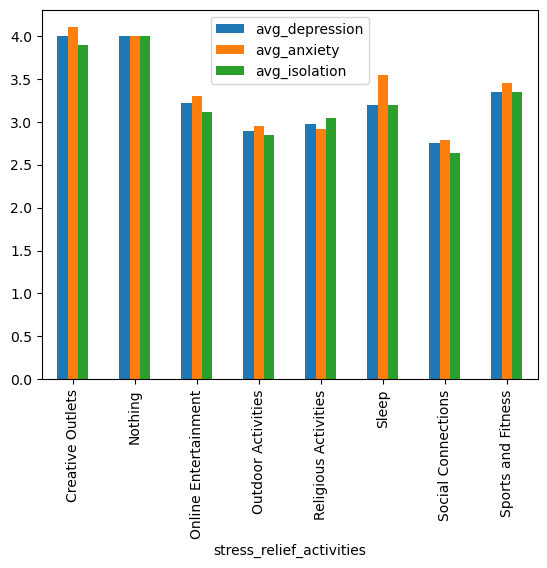

In [118]:
avg_stress_relief_fig

In [121]:
degree_level_data = raw_data.groupby('degree_level').sum('isolation')

In [123]:
degree_level_data['count'] = raw_data.groupby('degree_level').size()

In [124]:
degree_level_data

,age,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,count
degree_level,,,,,,,,,,,
Postgraduate,46,9,8,8,6,5,8,7,7,9,2
Undergraduate,1689,333,330,321,289,237,272,273,275,253,85
